# Start of EDA

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, SplineTransformer
# from pyearth
from sklearn.pipeline import Pipeline
import pickle


import warnings
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv", na_values='none')
data.head(5).transpose()

,0,1,2,3,4
status,no checking account,no checking account,... < 0 DM,no checking account,no checking account
duration,18,9,12,12,12
credit_history,all credits at this bank paid back duly,all credits at this bank paid back duly,no credits taken/all credits paid back duly,all credits at this bank paid back duly,all credits at this bank paid back duly
purpose,car (used),others,retraining,others,others
amount,1049,2799,841,2122,2171
savings,unknown/no savings account,unknown/no savings account,... < 100 DM,unknown/no savings account,unknown/no savings account
employment_duration,< 1 yr,1 <= ... < 4 yrs,4 <= ... < 7 yrs,1 <= ... < 4 yrs,1 <= ... < 4 yrs
installment_rate,< 20,25 <= ... < 35,25 <= ... < 35,20 <= ... < 25,< 20
personal_status_sex,female : non-single or male : single,male : married/widowed,female : non-single or male : single,male : married/widowed,male : married/widowed
other_debtors,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(1000, 21)

In [4]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [5]:
for i in data.columns:
    print(f'{i}\'s {data[i].nunique()} unique values:')
    k = 0
    for x in data[i].unique():        
        if k < 5:
            print(x)
            k += 1
        else:
            print('... ... ... ...')
            break
    print('\n')

status's 4 unique values:
no checking account
... < 0 DM
... >= 200 DM / salary for at least 1 year
0<= ... < 200 DM


duration's 33 unique values:
18
9
12
10
8
... ... ... ...


credit_history's 5 unique values:
all credits at this bank paid back duly
no credits taken/all credits paid back duly
existing credits paid back duly till now
delay in paying off in the past
critical account/other credits elsewhere


purpose's 10 unique values:
car (used)
others
retraining
furniture/equipment
car (new)
... ... ... ...


amount's 923 unique values:
1049
2799
841
2122
2171
... ... ... ...


savings's 5 unique values:
unknown/no savings account
... <  100 DM
100 <= ... <  500 DM
... >= 1000 DM
500 <= ... < 1000 DM


employment_duration's 5 unique values:
< 1 yr
1 <= ... < 4 yrs
4 <= ... < 7 yrs
unemployed
>= 7 yrs


installment_rate's 4 unique values:
< 20
25 <= ... < 35
20 <= ... < 25
>= 35


personal_status_sex's 4 unique values:
female : non-single or male : single
male : married/widowed
femal

In [6]:
print(f'{data.memory_usage(deep=True).sum() / 1024**2:.3f} MB')
print(f'{data.memory_usage(deep=True).sort_values(ascending=False) / 1024**2}')

1.064 MB
credit_history             0.085771
job                        0.072227
personal_status_sex        0.071379
status                     0.071003
property                   0.069630
savings                    0.067519
employment_duration        0.058064
purpose                    0.057754
present_residence          0.057598
telephone                  0.057499
installment_rate           0.054375
people_liable              0.052896
housing                    0.051126
credit_risk                0.050259
foreign_worker             0.048673
number_credits             0.048389
other_installment_plans    0.034332
other_debtors              0.032941
duration                   0.007629
amount                     0.007629
age                        0.007629
Index                      0.000126
dtype: float64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            93 non-null     object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  186 non-null    object
 14  housing                  1000 non-null   

In [8]:
data.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


In [3]:
data.duplicated().sum()

np.int64(0)

In [4]:
data.isna().sum()[data.isna().sum() > 0]

other_debtors              907
other_installment_plans    814
dtype: int64

### Вариант 1 - удалить эти фичи

In [3]:
data.drop(['other_debtors', 'other_installment_plans'], axis=1, inplace=True)

In [46]:
y = data['credit_risk']
X = data.drop('credit_risk', axis=1)

num_cols = ['duration', 'amount', 'age']
cat_cols = [i for i in X.columns if i not in num_cols]

num_mask = X.columns.isin(num_cols)
cat_mask = ~num_mask

### Вариант 2 - заменить на __missing__ в SimpleImputer, чтобы OHE создавал отдельную категорию для пропуска

In [11]:
y = data['credit_risk']
X = data.drop('credit_risk', axis=1)

num_cols = ['duration', 'amount', 'age']
cat_cols = [i for i in X.columns if i not in num_cols]

num_mask = X.columns.isin(num_cols)
cat_mask = ~num_mask

In [ ]:
imputer = SimpleImputer(strategy='constant', fill_value='__missing__')
X_cat_imputed = pd.DataFrame(data=imputer.fit_transform(X[cat_cols]), columns=cat_cols)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.3)

### Вариант 3 - заменить на most_frequent в SimpleImputer

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.3)

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
x_train_cat_imputed = pd.DataFrame(data=imputer.fit_transform(x_train[cat_cols]), columns=cat_cols)
x_test_cat_imputed = pd.DatFrame(data=imputer.transform(x_test[cat_cols]), columns=cat_cols)

## Оцениваем баланс классов

In [6]:
data['credit_risk'].value_counts()

credit_risk
good    700
bad     300
Name: count, dtype: int64

## Замечаем дисбаланс классов


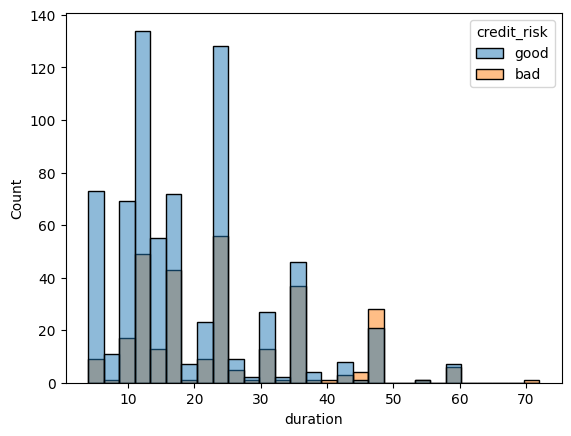

In [17]:
sns.histplot(data=data, x=num_cols[0], hue='credit_risk')
# sns.histplot(data=data, x=num_cols[1], hue='credit_risk')
# sns.histplot(data=data, x=num_cols[2], hue='credit_risk')
plt.show()

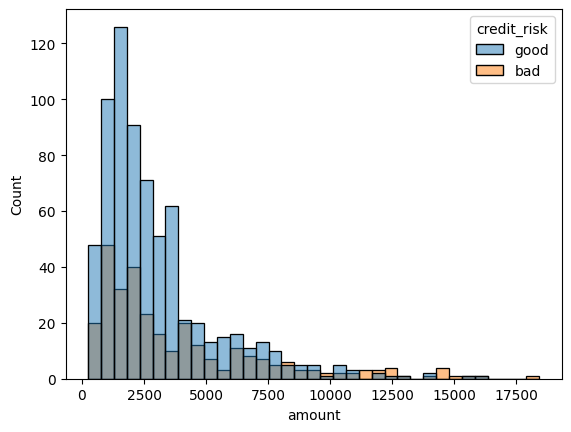

In [18]:
# sns.histplot(data=data, x=num_cols[0], hue='credit_risk')
sns.histplot(data=data, x=num_cols[1], hue='credit_risk')
# sns.histplot(data=data, x=num_cols[2], hue='credit_risk')
plt.show()

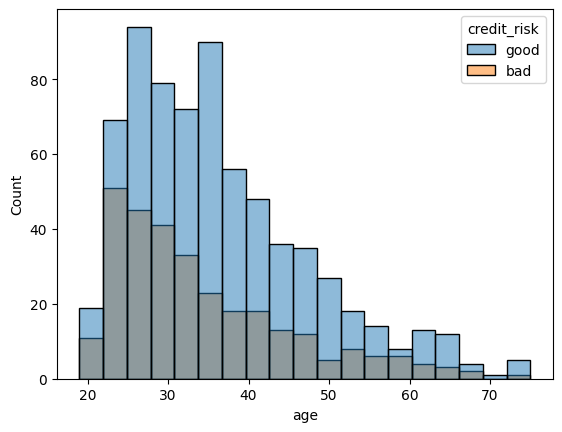

In [19]:
# sns.histplot(data=data, x=num_cols[0], hue='credit_risk')
# sns.histplot(data=data, x=num_cols[1], hue='credit_risk')
sns.histplot(data=data, x=num_cols[2], hue='credit_risk')
plt.show()

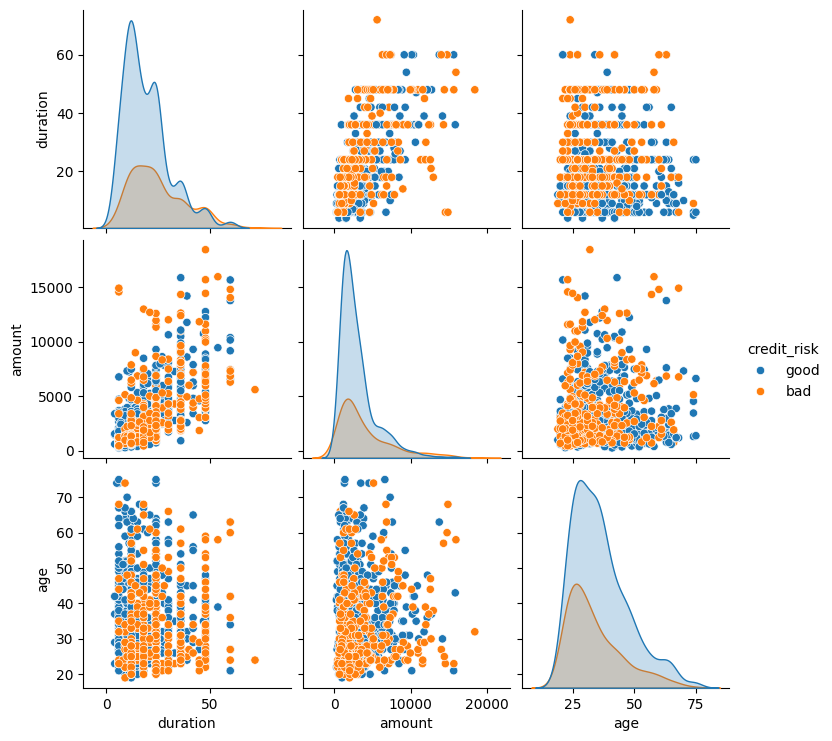

In [20]:
sns.pairplot(data, hue='credit_risk')
plt.show()

In [44]:
# sns.boxplot(data)
data.melt(value_vars=num_cols, var_name='feature', value_name='value')

,feature,value
0,duration,18
1,duration,9
2,duration,12
3,duration,12
4,duration,12
...,...,...
2995,age,21
2996,age,45
2997,age,30
2998,age,52


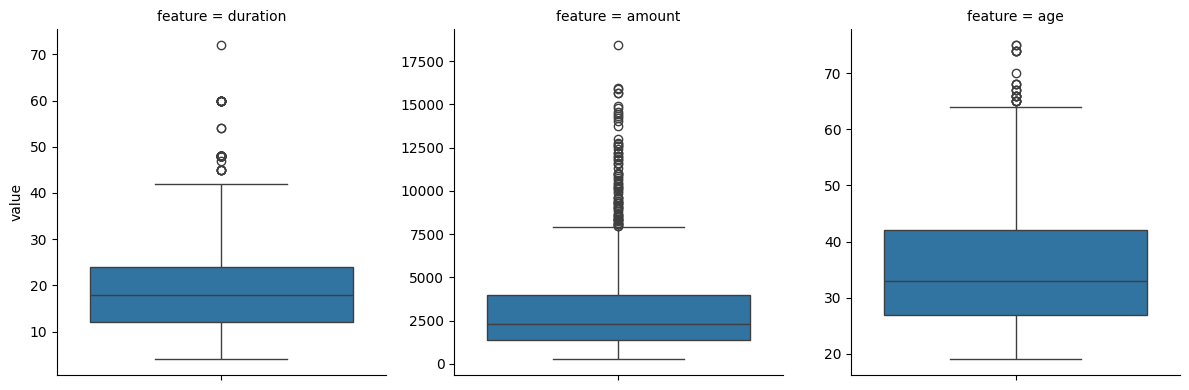

In [ ]:
melted = data.melt(value_vars=num_cols, var_name='feature', value_name='value')
g = sns.FacetGrid(sharex=False, sharey=False, data=melted, col='feature', height=4)
g.map_dataframe(sns.boxplot, y='value')
plt.show()

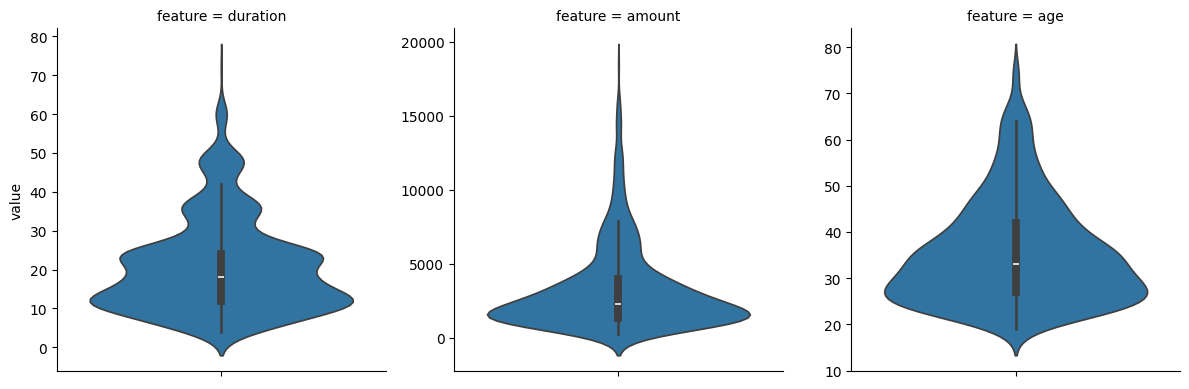

In [109]:
melted = data.melt(value_vars=num_cols, var_name='feature', value_name='value')
g = sns.FacetGrid(sharex=False, sharey=False, data=melted, col='feature', height=4)
g.map_dataframe(sns.violinplot, y='value')
plt.show()

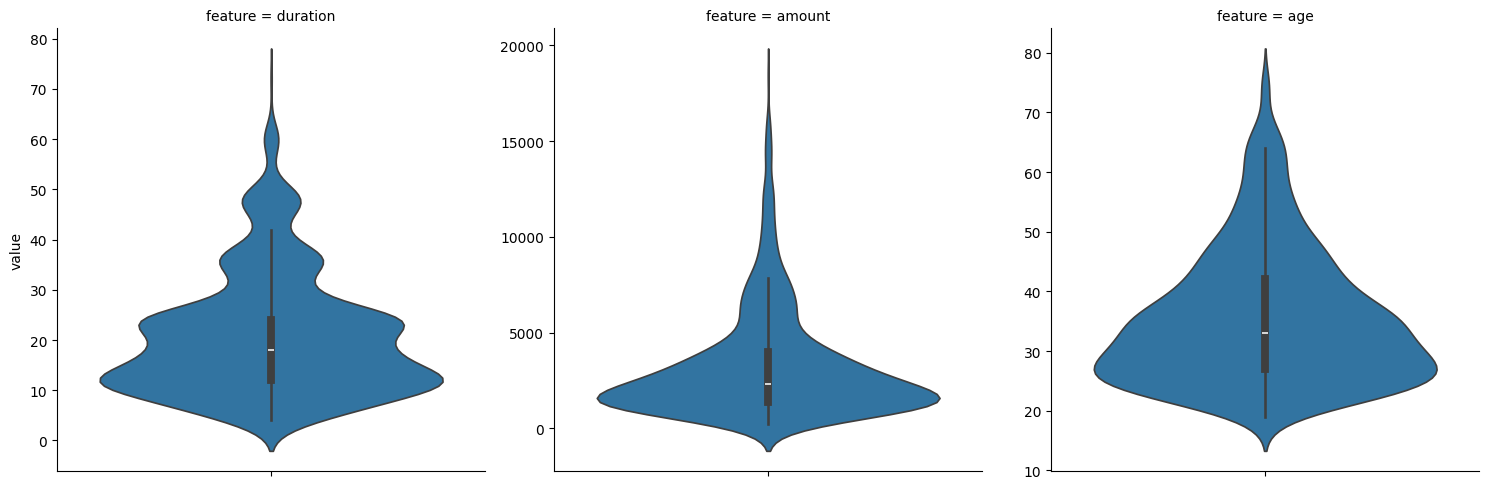

In [117]:
melted = data.melt(value_vars=num_cols, var_name='feature', value_name='value')
sns.catplot(kind='violin', data=melted, y='value', col='feature', sharex=False, sharey=False)
plt.show()

## Будем считать, что все, что лежит за усами является выбросами. 

In [19]:
y = data['credit_risk']
X = data.drop('credit_risk', axis=1)

num_cols = ['duration', 'amount', 'age']
cat_cols = [i for i in X.columns if i not in num_cols]

num_mask = X.columns.isin(num_cols)
cat_mask = ~num_mask

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.3)

In [21]:
# обрезаем выбросы

for i in num_cols:
    Q1 = x_train[i].quantile(0.25)
    Q3 = x_train[i].quantile(0.75)
    IQR = Q3 - Q1
    k = 1.5
    lower_boundary = Q1 - k * IQR
    upper_boundary = Q3 + k * IQR    
    x_train[i][x_train[i] > upper_boundary] = Q3
    x_train[i][x_train[i] < lower_boundary] = Q1
    x_test[i][x_test[i] > upper_boundary] = Q3
    x_test[i][x_test[i] < lower_boundary] = Q1


In [22]:
# минмакс скейлинг

scaler = MinMaxScaler()
x_train_num_scaled = pd.DataFrame(data=scaler.fit_transform(x_train[num_cols]), columns=num_cols)
x_test_num_scaled = pd.DataFrame(data=scaler.transform(x_test[num_cols]), columns=num_cols)

In [ ]:
# есть еще вайб сделать сплайны
x_train_num_scaled.shape
spline = SplineTransformer(n_knots=5)
x_train_num_splined = pd.DataFrame(data=spline.fit_transform(x_train_num_scaled), columns = spline.get_feature_names_out(num_cols))
x_test_num_splined = pd.DataFrame(data=spline.transform(x_test_num_scaled), columns=spline.get_feature_names_out(num_cols))

In [24]:
#  OHE энкодинг

OHE = OneHotEncoder(sparse_output=False)
x_train_cat_encoded = pd.DataFrame(data=OHE.fit_transform(x_train[cat_cols]), columns=OHE.get_feature_names_out(cat_cols))
x_test_cat_encoded = pd.DataFrame(data=OHE.transform(x_test[cat_cols]), columns=OHE.get_feature_names_out(cat_cols))

# End of EDA

In [ ]:
# склеиваем категориальные и числовые данные СО СПЛАЙНАМИ

x_train = pd.concat([x_train_cat_encoded, x_train_num_splined], axis=1)
x_test = pd.concat([x_test_cat_encoded, x_test_num_splined], axis=1)

In [104]:
x_train.shape

(700, 83)

In [105]:
lr = LogisticRegression().fit(x_train, y_train)
print('Train report:', classification_report(y_train, lr.predict(x_train)))
print('\n\n\n\n\n')
print('Test report:', classification_report(y_test, lr.predict(x_test)))

Train report:               precision    recall  f1-score   support

         bad       0.69      0.49      0.57       208
        good       0.81      0.91      0.85       492

    accuracy                           0.78       700
   macro avg       0.75      0.70      0.71       700
weighted avg       0.77      0.78      0.77       700







Test report:               precision    recall  f1-score   support

         bad       0.62      0.52      0.56        92
        good       0.80      0.86      0.83       208

    accuracy                           0.75       300
   macro avg       0.71      0.69      0.70       300
weighted avg       0.74      0.75      0.75       300



In [25]:
# склеиваем категориальные и числовые данные БЕЗ СПЛАЙНОВ

x_train = pd.concat([x_train_cat_encoded, x_train_num_scaled], axis=1)
x_test = pd.concat([x_test_cat_encoded, x_test_num_scaled], axis=1)

In [26]:
x_train.shape

(700, 71)

In [27]:
lr = LogisticRegression().fit(x_train, y_train)
print('Train report:', classification_report(y_train, lr.predict(x_train)))
print('\n\n\n\n\n')
print('Test report:', classification_report(y_test, lr.predict(x_test)))

Train report:               precision    recall  f1-score   support

         bad       0.67      0.51      0.58       208
        good       0.81      0.89      0.85       492

    accuracy                           0.78       700
   macro avg       0.74      0.70      0.72       700
weighted avg       0.77      0.78      0.77       700







Test report:               precision    recall  f1-score   support

         bad       0.66      0.50      0.57        92
        good       0.80      0.88      0.84       208

    accuracy                           0.77       300
   macro avg       0.73      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300



In [29]:
y = data['credit_risk']
X = data.drop('credit_risk', axis=1)

num_cols = ['duration', 'amount', 'age']
cat_cols = [i for i in X.columns if i not in num_cols]

num_mask = X.columns.isin(num_cols)
cat_mask = ~num_mask

In [ ]:
#  smote

from imblearn.over_sampling import SMOTENC
smote = SMOTENC(categorical_features=cat_cols)
x_smote, y_smote = smote.fit_resample(X, y)

0       good
1       good
2       good
3       good
4       good
        ... 
1395     bad
1396     bad
1397     bad
1398     bad
1399     bad
Name: credit_risk, Length: 1400, dtype: object

# Хочу сделать пайплайны
# Первый пайплайн это работа с категориальными данными
# Второй работа с числовыми данными
# Третий сборка данных воедино
# Четвертый обучение модели
# Потом делаю гридсерч св
# Еще бы куда-то воткнуть работу с дисбалансом классов и выбор оптимальной модели
#
#
#

In [ ]:
num_